In [1]:
# Cell A: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model


In [2]:
# Cell B: Load prepared dataset for one stock (AAL for example)
df = pd.read_csv("data/prepared/AAL_prepared.csv")

# Use returns column
returns = df["ret_1d"].dropna()
print(returns.head())


0    0.049036
1    0.009160
2   -0.014080
3    0.022555
4    0.013174
Name: ret_1d, dtype: float64


In [3]:
# Cell C: GARCH(1,1) model
garch11 = arch_model(returns, vol='GARCH', p=1, q=1, dist='normal')
res_garch11 = garch11.fit(disp="off")
print("=== GARCH(1,1) Results ===")
print(res_garch11.summary())


C:\Users\LAPTOPS HUB\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005016. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


=== GARCH(1,1) Results ===
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 ret_1d   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2888.43
Distribution:                  Normal   AIC:                          -5768.86
Method:            Maximum Likelihood   BIC:                          -5748.47
                                        No. Observations:                 1209
Date:                Wed, Sep 03 2025   Df Residuals:                     1208
Time:                        11:23:50   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0312e-03  6.341

In [4]:
# Cell D: GJR-GARCH(1,1,1) model
gjr = arch_model(returns, vol='GARCH', p=1, q=1, o=1, dist='normal')
res_gjr = gjr.fit(disp="off")
print("=== GJR-GARCH Results ===")
print(res_gjr.summary())


C:\Users\LAPTOPS HUB\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005016. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


=== GJR-GARCH Results ===
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                 ret_1d   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                2894.52
Distribution:                  Normal   AIC:                          -5779.03
Method:            Maximum Likelihood   BIC:                          -5753.54
                                        No. Observations:                 1209
Date:                Wed, Sep 03 2025   Df Residuals:                     1208
Time:                        11:24:19   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.9284e-04  6.296e

In [5]:
# Cell E: EGARCH(1,1) model
egarch = arch_model(returns, vol='EGARCH', p=1, q=1, dist='normal')
res_egarch = egarch.fit(disp="off")
print("=== EGARCH Results ===")
print(res_egarch.summary())


C:\Users\LAPTOPS HUB\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005016. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


=== EGARCH Results ===
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                 ret_1d   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                2889.15
Distribution:                  Normal   AIC:                          -5770.29
Method:            Maximum Likelihood   BIC:                          -5749.90
                                        No. Observations:                 1209
Date:                Wed, Sep 03 2025   Df Residuals:                     1208
Time:                        11:24:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.2000e-04  6.440e-04

In [6]:
# Cell F: Compare models using AIC and BIC
models = {
    "GARCH(1,1)": res_garch11,
    "GJR-GARCH": res_gjr,
    "EGARCH": res_egarch
}

comparison = pd.DataFrame({
    "Model": list(models.keys()),
    "AIC": [m.aic for m in models.values()],
    "BIC": [m.bic for m in models.values()]
})

print(comparison)


        Model          AIC          BIC
0  GARCH(1,1) -5768.864891 -5748.474695
1   GJR-GARCH -5779.030196 -5753.542452
2      EGARCH -5770.291215 -5749.901019


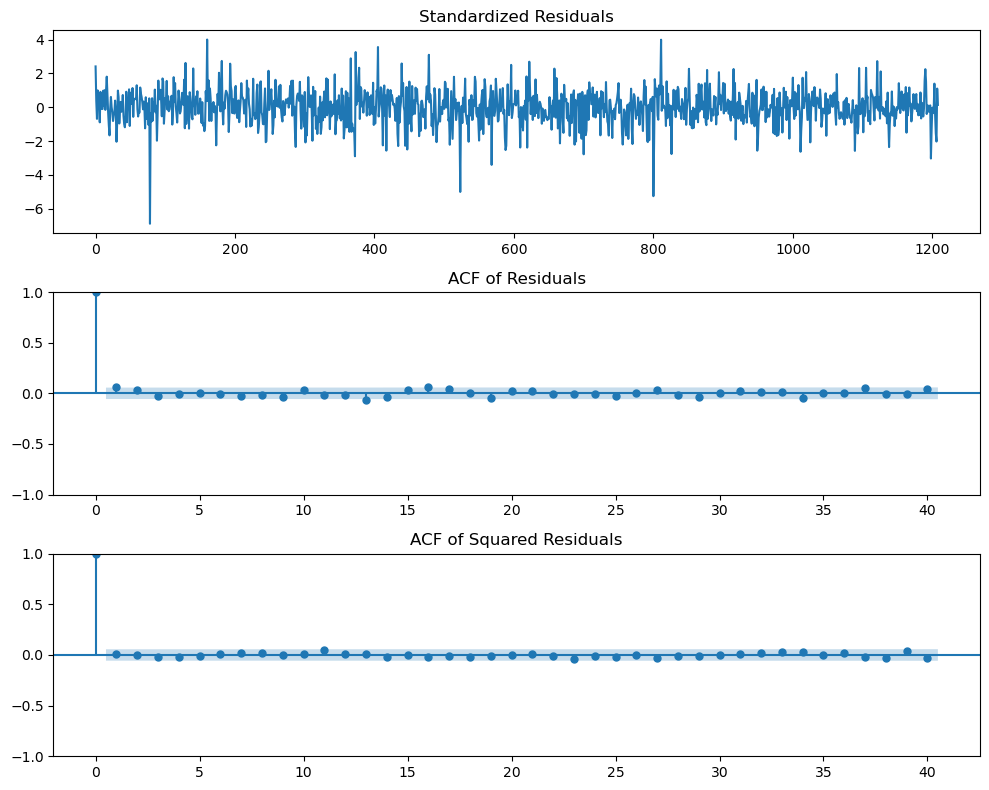

Ljung-Box Test on Residuals:
       lb_stat  lb_pvalue
10  10.196545   0.423422
20  29.061335   0.086559

Ljung-Box Test on Squared Residuals:
      lb_stat  lb_pvalue
10  2.502198   0.990844
20  7.570321   0.994350


In [7]:
# Cell G: Residual analysis for GARCH(1,1)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Standardized residuals
resid = res_garch11.resid / res_garch11.conditional_volatility

# Plot residuals
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(resid)
axes[0].set_title("Standardized Residuals")

plot_acf(resid.dropna(), lags=40, ax=axes[1])
axes[1].set_title("ACF of Residuals")

plot_acf(resid.dropna()**2, lags=40, ax=axes[2])
axes[2].set_title("ACF of Squared Residuals")

plt.tight_layout()
plt.show()

# Ljung-Box test for residuals
ljung_resid = acorr_ljungbox(resid.dropna(), lags=[10, 20], return_df=True)
print("Ljung-Box Test on Residuals:\n", ljung_resid)

# Ljung-Box test for squared residuals (to detect ARCH effects)
ljung_sq = acorr_ljungbox(resid.dropna()**2, lags=[10, 20], return_df=True)
print("\nLjung-Box Test on Squared Residuals:\n", ljung_sq)


In [8]:
# Cell H: Compare all models with AIC and BIC
models = {
    "GARCH(1,1)": res_garch11,
    "GJR-GARCH": res_gjr,
    "EGARCH": res_egarch
}

comparison = pd.DataFrame({
    "Model": list(models.keys()),
    "AIC": [m.aic for m in models.values()],
    "BIC": [m.bic for m in models.values()]
}).sort_values("AIC")

print("Model Comparison (lower is better):")
print(comparison)


Model Comparison (lower is better):
        Model          AIC          BIC
1   GJR-GARCH -5779.030196 -5753.542452
2      EGARCH -5770.291215 -5749.901019
0  GARCH(1,1) -5768.864891 -5748.474695


One-step ahead forecasts (variance):
           h.1
1208  0.000558


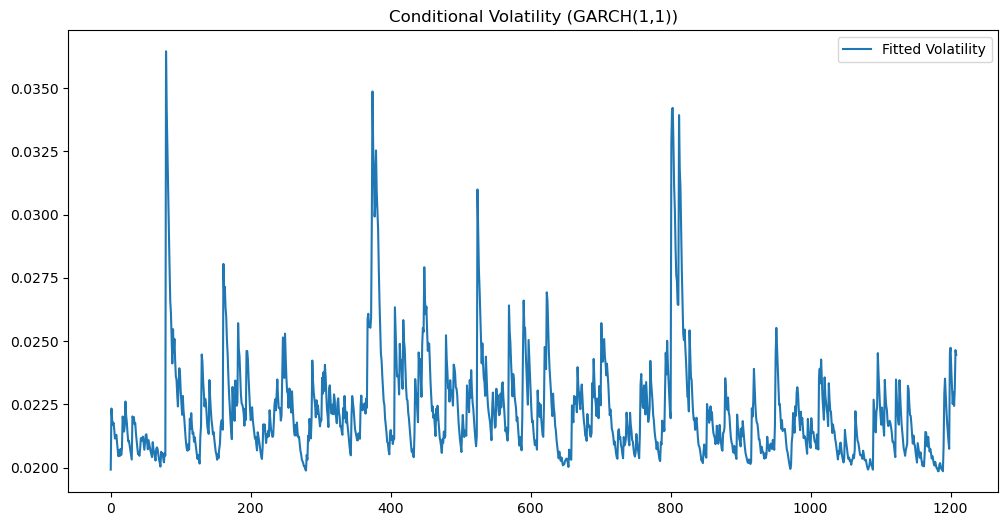

In [9]:
# Cell I: One-step ahead volatility forecast
forecast = res_garch11.forecast(horizon=1, reindex=False)

# Last few predicted variances
print("One-step ahead forecasts (variance):")
print(forecast.variance.tail())

# Plot conditional volatility vs realized
plt.figure(figsize=(12,6))
plt.plot(res_garch11.conditional_volatility, label="Fitted Volatility")
plt.title("Conditional Volatility (GARCH(1,1))")
plt.legend()
plt.show()


5-step ahead forecasted variance (last available point):
           h.1      h.2       h.3       h.4       h.5
1208  0.000558  0.00055  0.000543  0.000537  0.000532


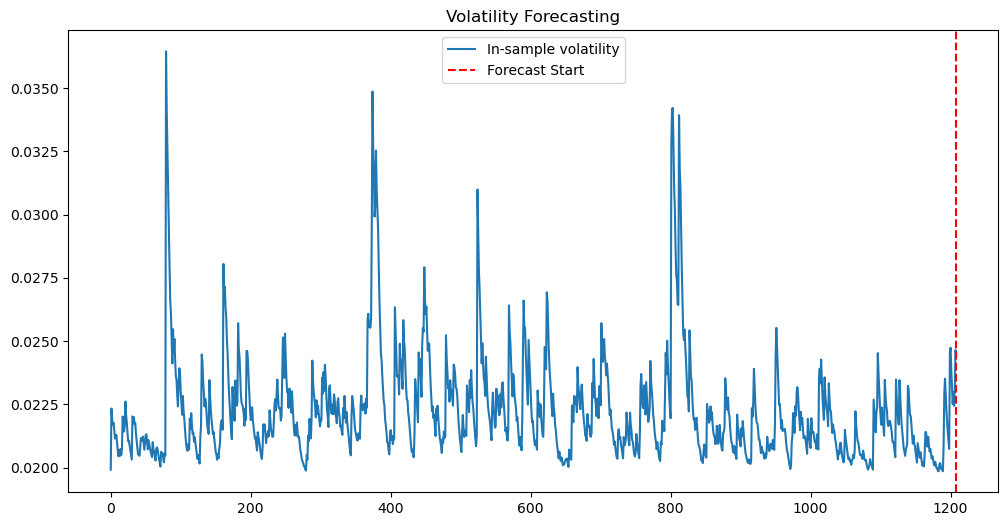

In [10]:
# Cell J: Multi-step ahead forecasts (5 days)
forecast_multi = res_garch11.forecast(horizon=5, reindex=False)

print("5-step ahead forecasted variance (last available point):")
print(forecast_multi.variance[-1:])

# Plotting predicted volatility vs realized
plt.figure(figsize=(12,6))
plt.plot(res_garch11.conditional_volatility, label="In-sample volatility")
plt.axvline(len(returns)-1, color="r", linestyle="--", label="Forecast Start")
plt.title("Volatility Forecasting")
plt.legend()
plt.show()


In [11]:
# Cell K: Evaluate forecasts against realized volatility (from Phase 2)

# Realized volatility (rolling 21-day) from your dataset
realized_vol = df["ret_1d"].rolling(21).std()

# Align with conditional volatility
aligned = pd.DataFrame({
    "realized_vol": realized_vol,
    "garch_vol": res_garch11.conditional_volatility
}).dropna()

# RMSE and MAE
rmse = np.sqrt(np.mean((aligned["realized_vol"] - aligned["garch_vol"])**2))
mae = np.mean(np.abs(aligned["realized_vol"] - aligned["garch_vol"]))

print(f"Forecast Evaluation:\nRMSE = {rmse:.6f}, MAE = {mae:.6f}")


Forecast Evaluation:
RMSE = 0.004912, MAE = 0.003727
